### _____________________________________________________________________________________________________

# Proyecto EDA(Exploratory Data Analysis) - Book Sales

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("D:\PORTFOLIO\Archivos CSV\Books_Data_Clean.csv") # Importamos los datos

In [ ]:
df.head() # Vemos los primeros datos del DataFrame.

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [35]:
df.describe() # Hacemos el analisis estadistico de las variables numericas.

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,535.096154,1994.651822,4.008036,94866.456478,1819.810202,830.526735,4.814798,612.216599,9863.664980
std,307.964846,23.261176,0.246226,31386.007183,3947.719012,2275.742467,3.568810,368.666451,15461.338997
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.750000,1989.000000,3.850000,70663.250000,355.810000,0.000000,1.990000,292.500000,566.250000
50%,534.500000,2003.000000,4.020000,89309.000000,788.535000,267.120000,3.990000,595.500000,3969.000000
75%,797.250000,2010.000000,4.170000,113441.250000,1469.157500,713.263500,6.990000,924.500000,5454.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [ ]:
df = df[df['Publishing Year'] > 1900] # 

In [ ]:
df.isna().sum() # Hacemos un conteo de los valores NA de cada columna y los sumamos. 

index                   0
Publishing Year         0
Book Name               0
Author                  0
language_code          47
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [ ]:
df.dropna(subset="Book Name", inplace= True) # Eliminamos los NA de BOOK NAME ya que eliminar los NA De language_code nos podria hacer perder informacion valiosa.

In [ ]:
df.duplicated().sum() # Hacemos un conteo de los datos duplicados y los sumamos.

0

In [ ]:
df.nunique() # Hacemos un conteo de los datos unicos que hay en cada columna.

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

### _____________________________________________________________________________________________________

# Data Visualization

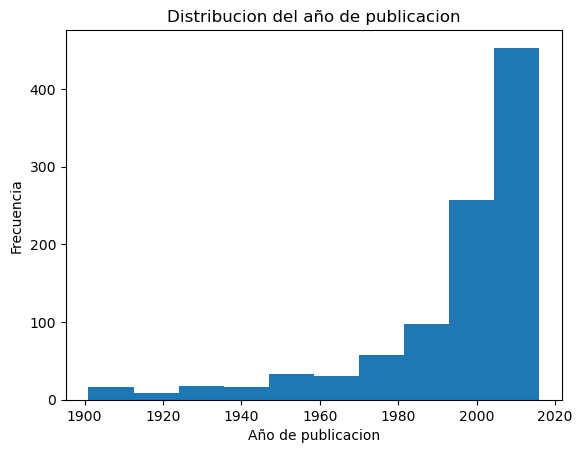

In [21]:
plt.hist(df['Publishing Year'])
plt.xlabel('Año de publicacion')
plt.ylabel('Frecuencia')
plt.title('Distribucion del año de publicacion')
plt.show()

### En este histograma se puede ver que principalmente tenemos libros nuevos.

### _____________________________________________________________________________________________________

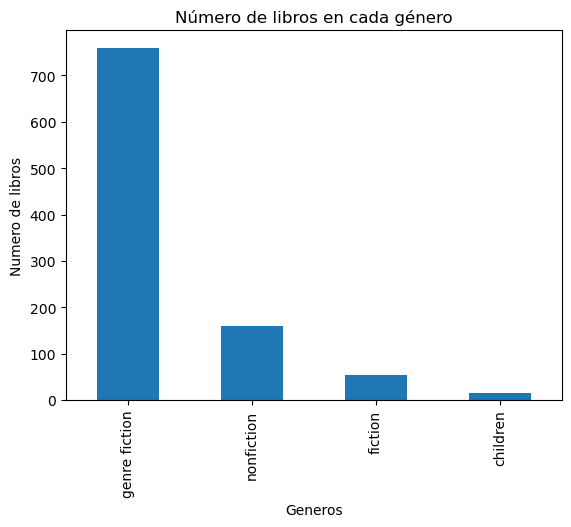

In [25]:
df['genre'].value_counts().plot(kind ='bar')
plt.xlabel('Generos')
plt.ylabel('Numero de libros')
plt.title('Número de libros en cada género')
plt.show()

### En este grafico de barras podemos ver que el genero con mas libros es 'genre fiction'

### _____________________________________________________________________________________________________

In [ ]:
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending= False)
# Agrupar los datos por autor, calcular el promedio de la calificación de los libros de cada autor, 
# y luego ordenar los autores de acuerdo con su calificación promedio en orden descendente.

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

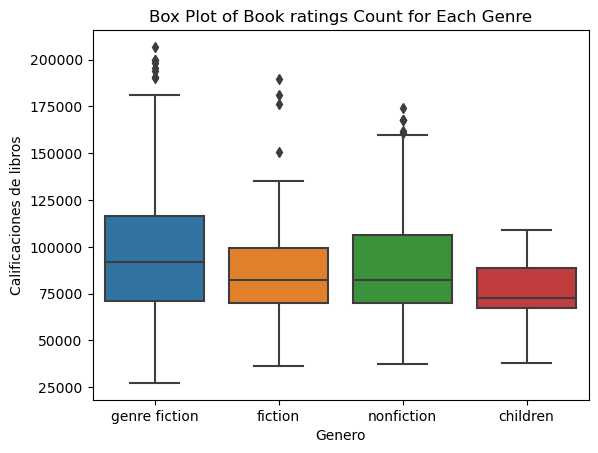

In [ ]:
sns.boxplot(x = 'genre', y='Book_ratings_count', data = df)
plt.xlabel('Genero')
plt.ylabel('Calificaciones de libros')
plt.title('Box Plot of Book ratings Count for Each Genre')
plt.show()
# Generamos un Grafico de cajas para

### _____________________________________________________________________________________________________

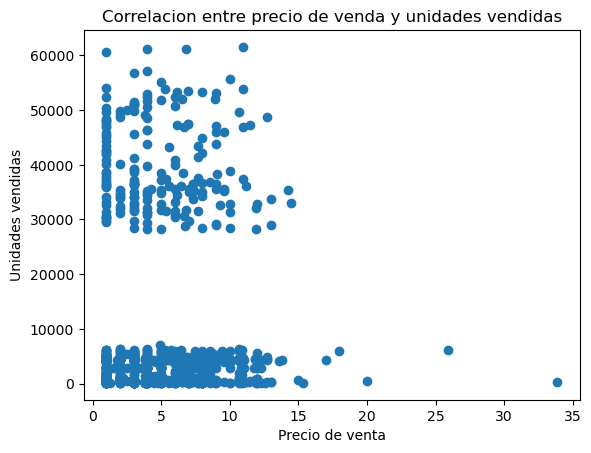

In [ ]:
plt.scatter(df['sale price'], df['units sold'])
plt.xlabel('Precio de venta')
plt.ylabel('Unidades vendidas')
plt.title('Correlacion entre precio de venda y unidades vendidas')
plt.show()

### Aca podemos ver que cuando el precio de venta es mas bajo la unidad vendida aumenta.

### _____________________________________________________________________________________________________

In [37]:
language_count = df['language_code'].value_counts()

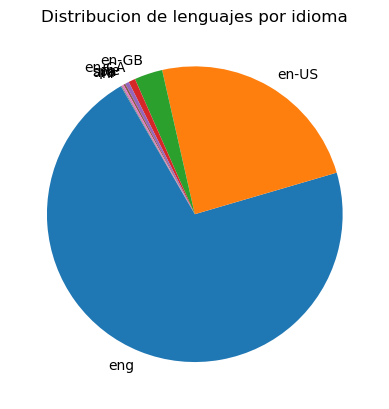

In [43]:
plt.pie(language_count, labels = language_count.index, startangle= 120)
plt.title('Distribucion de lenguajes por idioma')
plt.show()

### _____________________________________________________________________________________________________

In [47]:
df.groupby('Publisher ')['publisher revenue'].sum().sort_values(ascending= False)
# Agrupar los datos por editor, sumar los ingresos de cada uno, 
# y ordenar los editores por los ingresos totales en orden descendente.

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [53]:
df.groupby('Author_Rating')['Book_ratings_count'].mean().sort_values(ascending= False)
# Agrupar los datos por calificación de autor, calcular el promedio del número de calificaciones de los libros en cada grupo, 
# ordenar los promedios en orden descendente, y luego obtener el valor máximo de esos promedios.


Author_Rating
Intermediate    101400.272569
Famous           98295.250000
Novice           87318.464286
Excellent        83804.800595
Name: Book_ratings_count, dtype: float64

### _____________________________________________________________________________________________________

In [ ]:
total_gross_sales_by_author = df.groupby('Author')['gross sales'].sum()
# Agrupar los datos por autor y calcular la suma total de ventas brutas de sus libros


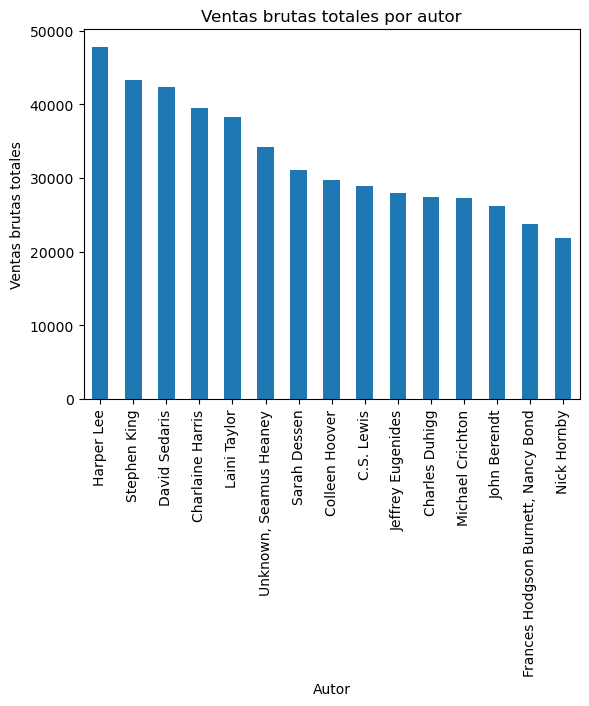

In [ ]:
# Ordenar las ventas brutas en orden descendente, seleccionar los 15 autores con mayores ventas y graficar en un gráfico de barras
total_gross_sales_by_author.sort_values(ascending=False).head(15).plot(kind = 'bar')
plt.xlabel('Autor')
plt.ylabel('Ventas brutas totales')
plt.title('Ventas brutas totales por autor')
plt.show()

### _____________________________________________________________________________________________________

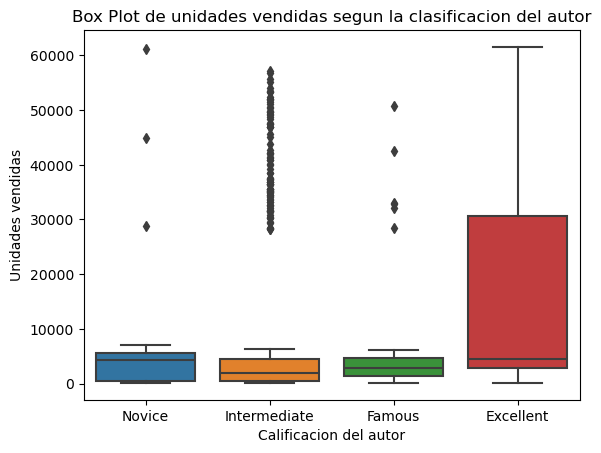

In [62]:
sns.boxplot(x='Author_Rating', y = 'units sold', data = df)
plt.xlabel('Calificacion del autor')
plt.ylabel('Unidades vendidas')
plt.title('Box Plot de unidades vendidas segun la clasificacion del autor')
plt.show()


### _____________________________________________________________________________________________________

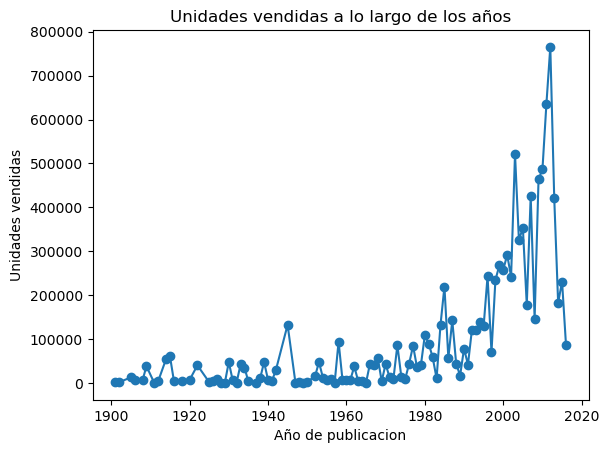

In [64]:
df.groupby('Publishing Year')['units sold'].sum().plot(kind= 'line', marker = 'o')
plt.xlabel('Año de publicacion')
plt.ylabel('Unidades vendidas')
plt.title('Unidades vendidas a lo largo de los años')
plt.show()